In [167]:
import awkward as ak
import numpy as np
import time
import coffea
import uproot
import hist
import vector
print("awkward version ", ak.__version__)
print("coffea version ", coffea.__version__)
from coffea import util, processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema
from collections import defaultdict
import pickle
from distributed.diagnostics.plugin import UploadDirectory
import os
from plot_utils import adjust_plot
import matplotlib.pyplot as plt
from utils import *



awkward version  1.10.3
coffea version  0.7.21


In [168]:
import mplhep as hep
hep.style.use("CMS")
plt.rcParams['figure.dpi'] = 60

In [200]:
fileset = {}
filedir = "samples/"
prependstr = "/mnt/data/cms"


eras_mc = [
        'UL16NanoAODv9', 
        'UL16NanoAODAPVv9',
        'UL17NanoAODv9', 
        'UL18NanoAODv9'
    ]



qcd_mc_filestr = "QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8_"

for era in eras_mc:
    fileset[era] = {}
    filename = filedir + qcd_mc_filestr + era + ".txt"
    with open(filename) as f:
        dy_mc_files = [prependstr + i.rstrip() for i in f.readlines() if i[0] != "#" ]
        fileset[era] = dy_mc_files

In [201]:
#skimmed_fileset

fileset = {'UL16NanoAODv9':['/mnt/data/cms/store/mc/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/skimmed/skimmed_total.root'], 
        'UL16NanoAODAPVv9':['/mnt/data/cms/store/mc/RunIISummer20UL16NanoAODAPVv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_preVFP_v11-v1/skimmed/skimmed_total.root'],
        'UL17NanoAODv9':['/mnt/data/cms/store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v2/skimmed/skimmed_total.root'], 
        'UL18NanoAODv9':['/mnt/data/cms/store/mc/RunIISummer20UL18NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/skimmed/skimmed_total.root']}

In [191]:
# #test 
#fileset = {'UL16NanoAODv9':['/mnt/data/cms/store/mc/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/skimmed/skimmed_total.root']}
#fileset = {'UL16NanoAODAPVv9':['/mnt/data/cms/store/mc/RunIISummer20UL16NanoAODAPVv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_preVFP_v11-v1/skimmed/skimmed_total.root']}
#fileset = {'UL17NanoAODv9':['/mnt/data/cms/store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v2/skimmed/skimmed_total.root']}
fileset = {'UL18NanoAODv9':['/mnt/data/cms/store/mc/RunIISummer20UL18NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/skimmed/skimmed_total.root']}

In [192]:
#f = uproot.open("/mnt/data/cms/store/mc/RunIISummer20UL18NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/2540000/894A5559-C6A2-7347-9C7C-2FB1EDDCCEA1.root")


In [193]:
#f["Events"]['Jet_rawFactor'].arrays(library = 'np' ) # divide the recojet pt by (1+rawFactor)

In [194]:
run = processor.Runner(
            executor = processor.FuturesExecutor(compression = None, workers = 8),
            schema=NanoAODSchema,
            chunksize=1000000,
            maxchunks=None,
            skipbadfiles=False
        )

In [195]:
output = run(
    fileset,
    "Events",
    processor_instance=QCDProcessor(),
)

fname_out = 'QCDresponse.pkl'

with open(fname_out, "wb") as f:
        pickle.dump( output, f )

Output()

Output()

In [176]:
#!cp "QCDresponse.pkl" "QCDresponse_old.pkl"

In [196]:
with open("QCDresponse.pkl", "rb") as f:
    output = pickle.load( f )

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fa3c9fce520>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

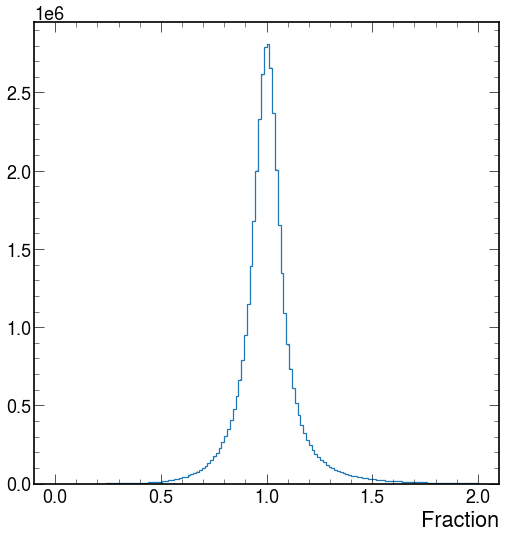

In [197]:
output["pt_reco_over_gen"].project('frac').plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fa3d8605970>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

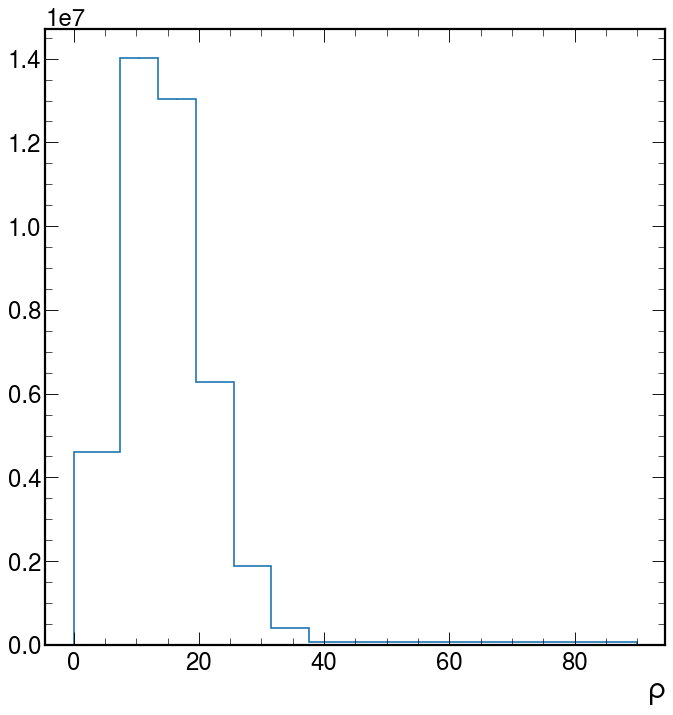

In [117]:
output["pt_reco_over_gen"].project('rho').plot()

### Bin Edges

In [118]:
hist = output["pt_reco_over_gen"]
hist.axes

(StrCategory(['UL16NanoAODv9'], growth=True, name='dataset', label='Primary dataset'),
 Variable(array([  10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,   90.,
         100.,  120.,  140.,  160.,  180.,  200.,  250.,  300.,  350.,
         400.,  450.,  500.,  600.,  700.,  800.,  900., 1000., 1500.,
        2000., 3000.]), name='pt', label='$p_{T}$ [GeV]'),
 Regular(150, 0, 2, name='frac', label='Fraction'),
 Variable([0, 0.5, 0.8, 1.1, 1.3, 1.7, 1.9, 2.1, 2.3, 2.5, 2.8, 3, 3.2, 4.7], name='eta', label='$\\eta$'),
 Variable([0, 7.47, 13.49, 19.52, 25.54, 31.57, 37.59, 90], name='rho', label='$\\rho$'))

In [119]:
hist = output["pt_reco_over_gen"]
datasets = hist.axes[0].centers
pt_bins = hist.axes[1].edges
frac_bins = hist.axes[2].edges
eta_bins = hist.axes[3].edges
rho_bins = hist.axes[4].edges

### Bin centers

In [120]:

pt_values = hist.axes[1].centers
frac_values = hist.axes[2].centers
eta_values = hist.axes[3].centers
rho_values = hist.axes[4].centers

### Bin Widths

In [121]:
pt_widths = hist.axes[1].widths
frac_widths = hist.axes[2].widths
eta_widths = hist.axes[3].widths
rho_widths = hist.axes[4].widths

In [122]:
pt_values

array([  15.,   25.,   35.,   45.,   55.,   65.,   75.,   85.,   95.,
        110.,  130.,  150.,  170.,  190.,  225.,  275.,  325.,  375.,
        425.,  475.,  550.,  650.,  750.,  850.,  950., 1250., 1750.,
       2500.])

In [123]:
eta_values

array([0.25, 0.65, 0.95, 1.2 , 1.5 , 1.8 , 2.  , 2.2 , 2.4 , 2.65, 2.9 ,
       3.1 , 3.95])

In [124]:
rho_bins

array([ 0.  ,  7.47, 13.49, 19.52, 25.54, 31.57, 37.59, 90.  ])

In [125]:
hist_np = hist.to_numpy()[0]

hist_np.shape

(1, 28, 150, 13, 7)

In [126]:
hist_frac = hist.project("dataset","frac").to_numpy()[0]

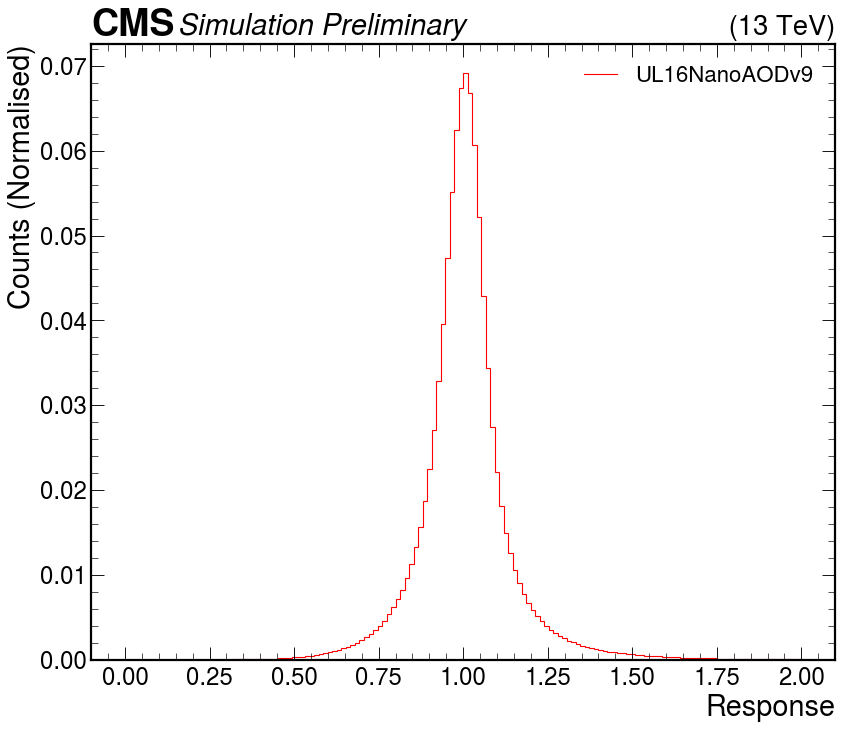

In [127]:
fig = plt.figure(figsize = (12,10))
colors = ['red', 'blue', 'orange' , 'green']
for i in range(len(datasets)):
    plt.stairs( hist_frac[i]/np.sum(hist_frac[i]),frac_bins,  label = eras_mc[i], color = colors[i])
    plt.xlabel("Response")
    plt.legend(loc = 'upper right', fontsize = 20)
    plt.ylabel("Counts (Normalised)")
    hep.cms.label("Preliminary")

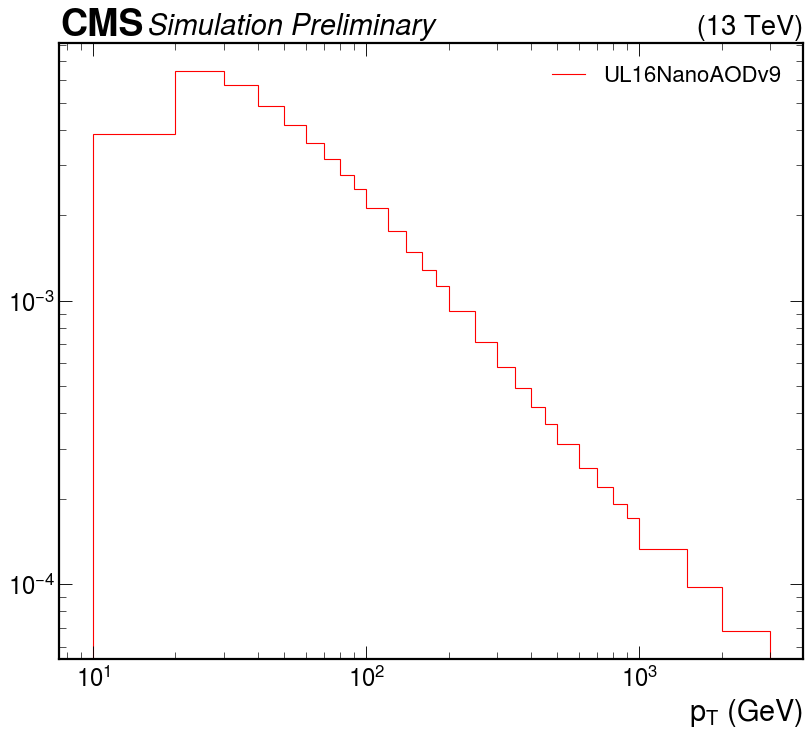

In [128]:
hist_pt = hist.project("dataset","pt").to_numpy()[0]
colors = ['red', 'blue', 'orange' , 'green']
fig = plt.figure(figsize = (12,10))
for i in range(len(datasets)):
    plt.stairs( hist_pt[i]/(np.sum(hist_pt[i])* hist.axes[1].widths),pt_bins,  label = eras_mc[i], color = colors[i])
    plt.xlabel(r"$p_T$ (GeV)")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend(loc = 'upper right', fontsize = 20)
    hep.cms.label("Preliminary")

In [129]:
#hist_frac_pt = np.sum(hist_np, axis = (0,2,4,5) )
hist_frac_pt = hist.project("pt","frac").to_numpy()[0]

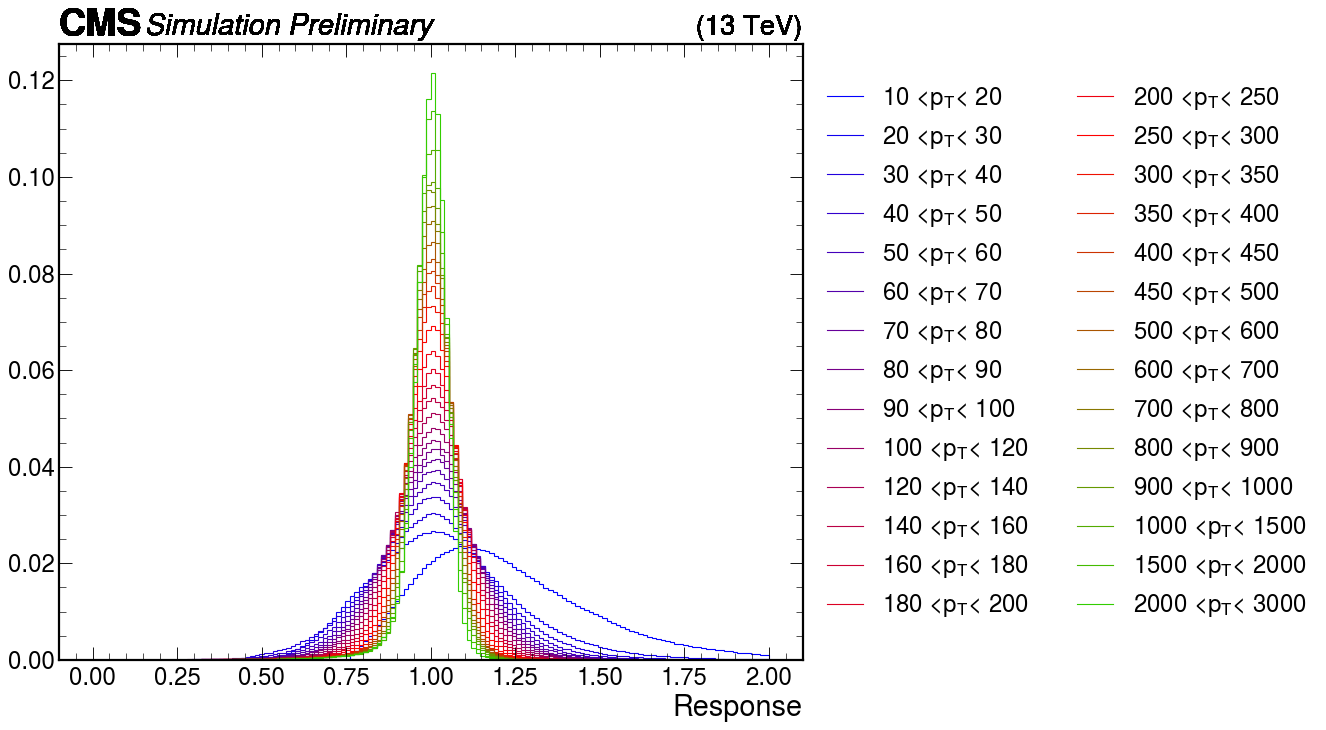

In [130]:
cm = plt.get_cmap('brg')
colors = [cm(1.*i/30) for i in range(28)]
fig = plt.figure(figsize = (12,10))
ax = plt.subplot()
ax.set_prop_cycle(color=colors)
for i in range(28):
    ax.stairs( hist_frac_pt[i]/np.sum(hist_frac_pt[i]),frac_bins,  label = str(int(pt_bins[i]))+r" <$p_T$< "  + str(int(pt_bins[i+1])) )
    ax.set_xlabel("Response")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
    hep.cms.label("Preliminary")

In [131]:
histfit = Histfit(hist_frac_pt, frac_values, pt_values)

In [132]:
histfit.store_parameters()

Mean: 1.0036315162203213 
Width: 0.04577226753196586


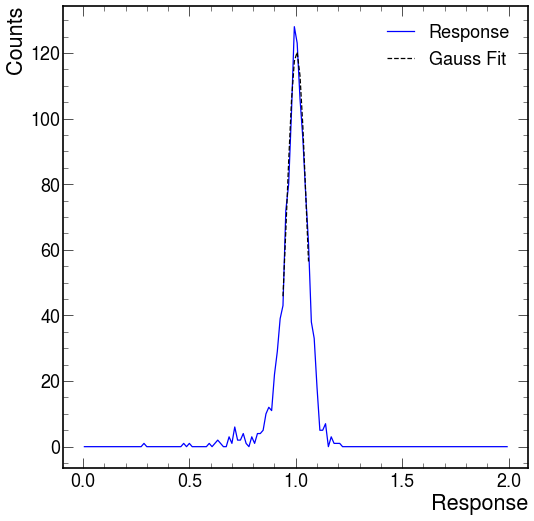

In [209]:
histfit.show_fit(24)
plt.xlabel("Response")
plt.ylabel("Counts")
plt.legend()

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

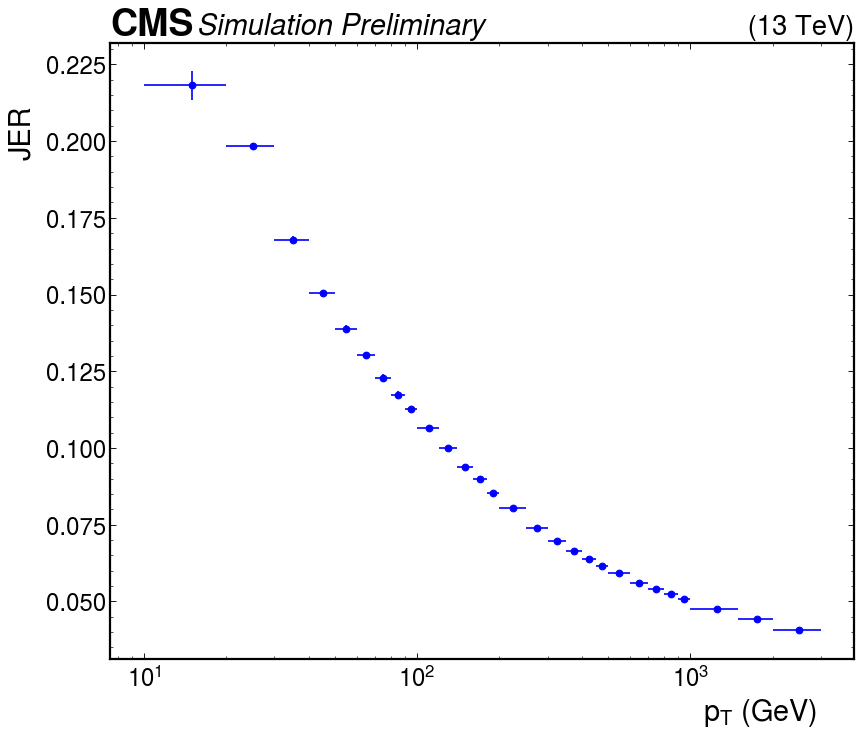

In [134]:
sigma_list = histfit.parameters["sigma"]
sigma_error_list  = histfit.parameters["sigmaErr"]
fig = plt.figure(figsize = (12,10))
ax = plt.subplot()
ax.errorbar(histfit.pt_values, sigma_list, np.power(sigma_error_list, 0.5), xerr = 0.5*np.array(pt_widths),  marker = 'o', linestyle = "", color = 'b', label = r'JER')
#plt.xlabel(r"$p_T$ (GeV)")
adjust_plot(ax, xlabel = r"$p_{T}$ (GeV)", ylabel = "JER", xscale = 'log')
hep.cms.label("Preliminary")
#plt.xscale("log")

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

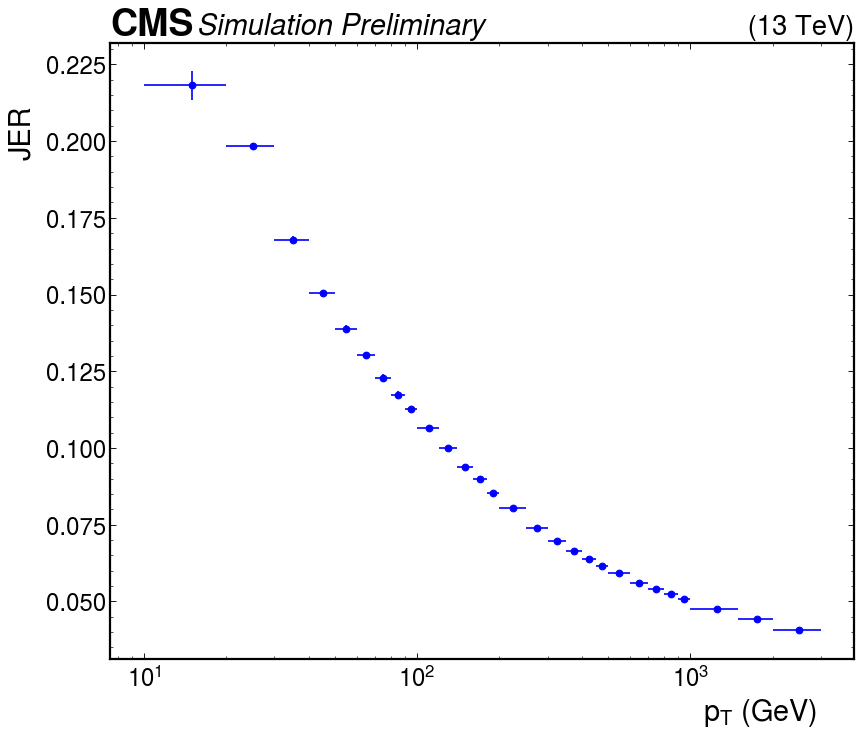

In [135]:
sigma_list = histfit.parameters["sigma"]
sigma_error_list  = histfit.parameters["sigmaErr"]
fig = plt.figure(figsize = (12,10))
ax = plt.subplot()
ax.errorbar(histfit.pt_values, sigma_list, np.power(sigma_error_list, 0.5), xerr = 0.5*np.array(pt_widths),  marker = 'o', linestyle = "", color = 'b', label = r'JER')
#plt.xlabel(r"$p_T$ (GeV)")
adjust_plot(ax, xlabel = r"$p_{T}$ (GeV)", ylabel = "JER", xscale = 'log')
hep.cms.label("Preliminary")
#plt.xscale("log")

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

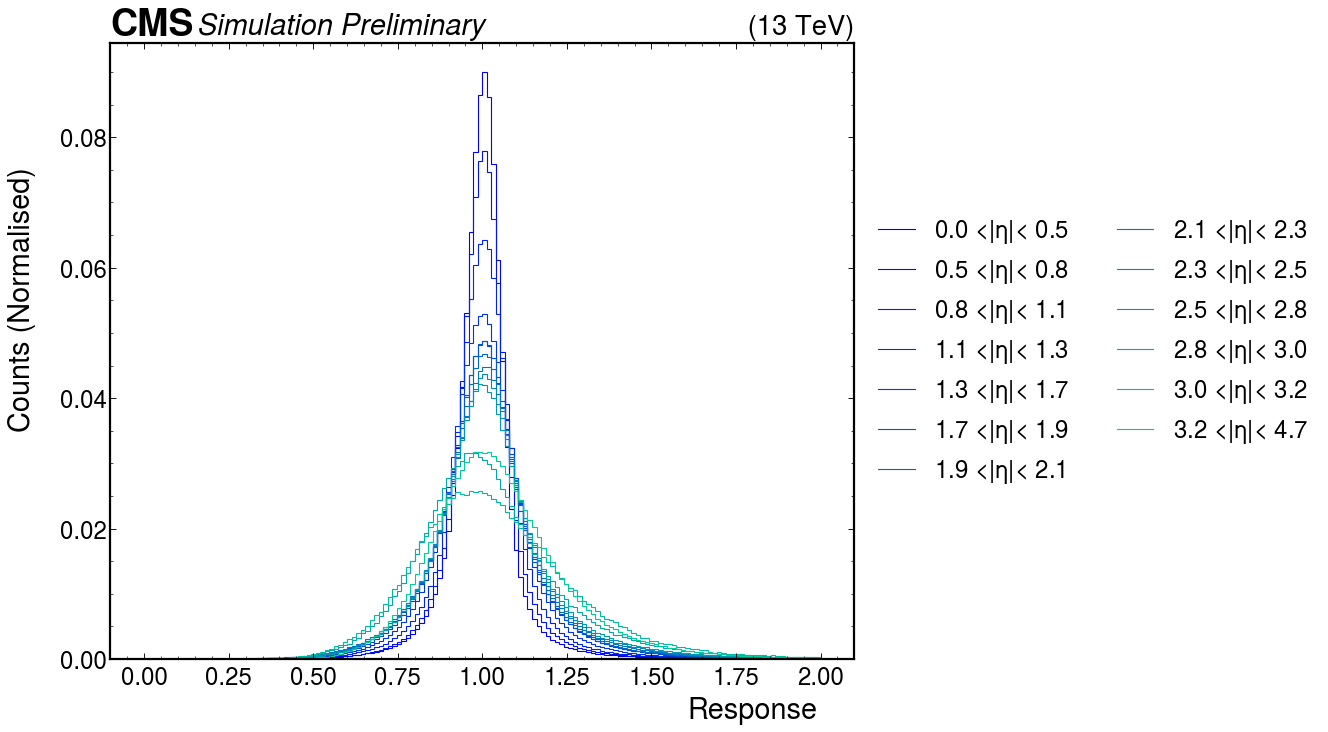

In [136]:
#hist_frac_eta = np.sum(hist_np, axis = (0,1,2,5) )
#hist_frac_eta = hist_frac_eta.T
fig = plt.figure(figsize = (12,10))

hist_frac_eta = hist.project('eta','frac').to_numpy()[0]
cm = plt.get_cmap('winter')
colors = [cm(1.*i/15) for i in range(len(eta_values))]
ax = plt.subplot()
ax.set_prop_cycle(color=colors)
for i in range(len(eta_values)):
    ax.stairs( hist_frac_eta[i]/np.sum(hist_frac_eta[i]),frac_bins,  label = str(round(eta_bins[i],2))+r" <$|\eta|$< "  + str(round(eta_bins[i+1],2)) )
    ax.set_xlabel("Response")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
    adjust_plot(ax, ylabel = "Counts (Normalised)", ylabel_coord=0.8)
hep.cms.label("Preliminary")

In [137]:
histfit_eta = Histfit(hist_frac_eta, frac_values, eta_values)
histfit_eta.store_parameters()

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

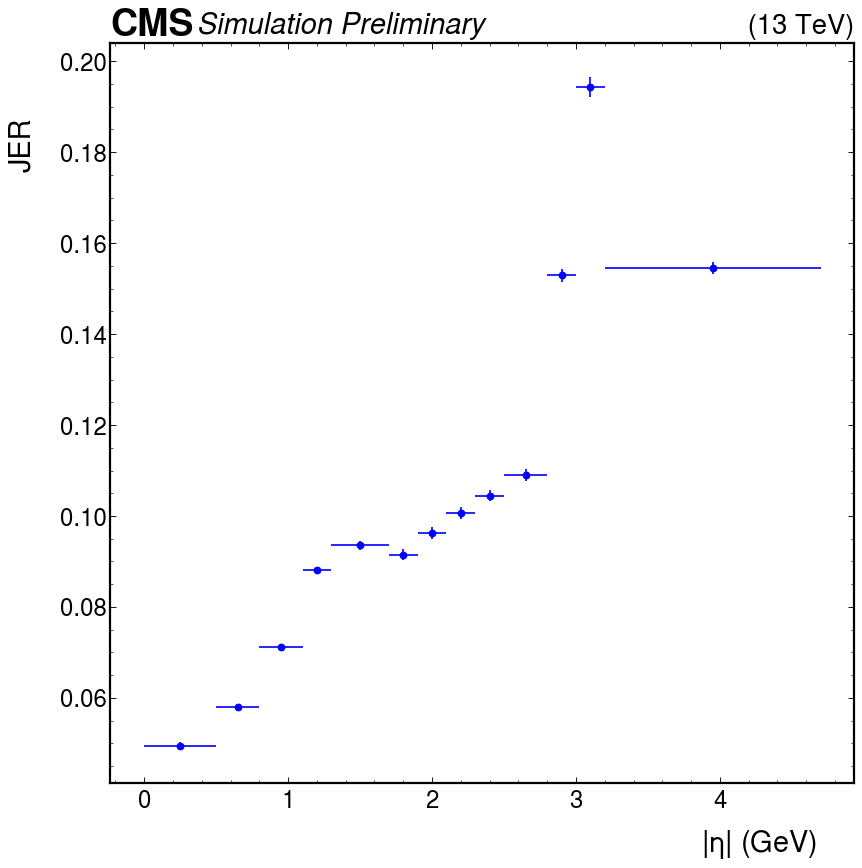

In [138]:
fig = plt.figure(figsize = (12,12))
sigma_list = histfit_eta.parameters["sigma"]
sigma_error_list  = histfit_eta.parameters["sigmaErr"]

ax = plt.subplot()
ax.errorbar(eta_values, sigma_list, np.power(sigma_error_list, 0.5), xerr = eta_widths/2,  marker = 'o', linestyle = "", color = 'b', label = r'JER')
#plt.xlabel(r"$p_T$ (GeV)")
adjust_plot(ax, xlabel = r"$|\eta|$ (GeV)", ylabel = "JER")
#plt.xscale("log")
hep.cms.label("Preliminary")

Mean: 1.0041635291472617 
Width: 0.09351978670760792


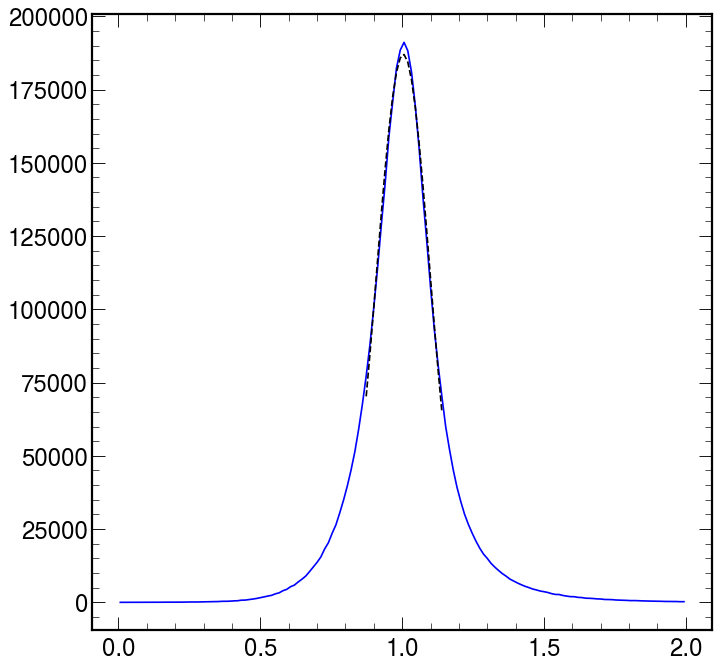

In [139]:
histfit_eta.show_fit(4)

In [140]:
# fig = plt.figure(figsize = (12,10))
# hist_frac_pileup = hist.project("pileup","frac").to_numpy()[0]
# cm = plt.get_cmap('brg')
# colors = [cm(1.*i/9) for i in range(9)]
# ax = plt.subplot()
# ax.set_prop_cycle(color=colors)
# for i in range(7):
#     ax.stairs( hist_frac_pileup[i]/np.sum(hist_frac_pileup[i]),frac_bins,  label = str(int(pileup_bins[i]))+r" <$\mu$< "  + str(int(pileup_bins[i+1])) )
#     ax.set_xlabel("Response")
#     #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
# adjust_plot(ax, ylabel = "Counts (Normalised)", ylabel_coord=0.8)
# ax.legend() 
# hep.cms.label("Preliminary")

In [141]:

    
# histfit_frac_pileup = Histfit(hist_frac_pileup, frac_values, pileup_values)
# histfit_frac_pileup.store_parameters()

In [142]:
# sigma_list = histfit_frac_pileup.parameters["sigma"]
# sigma_error_list  = histfit_frac_pileup.parameters["sigmaErr"]

# ax = plt.subplot()
# ax.errorbar(pileup_values[:], sigma_list[:], np.power(sigma_error_list[:], 0.5), xerr = pileup_widths[:]/2,  marker = 'o', linestyle = "", color = 'b', label = r'JER')
# adjust_plot(ax, xlabel = r"$\mu$ ", ylabel = "JER")


In [143]:
# import itertools
# ax = plt.subplot()
# markers = itertools.cycle(['o', 's', 'v', '^', 'D'])
# for i_pileup, hist_pt_frac in enumerate(hist_pileup_pt_frac):
#     histfit = Histfit(hist_pt_frac, frac_values, pt_values)
#     histfit.store_parameters()
    
#     sigma_list = histfit.parameters["sigma"]
#     sigma_error_list  = histfit.parameters["sigmaErr"]

#     ax.errorbar(pt_values, sigma_list, np.power(sigma_error_list, 0.5), xerr = pt_widths/2,   linestyle = "",  label = str(round(pileup_bins[i_pileup],2))+r" <$\mu$< "  + str(round(pileup_bins[i_pileup+1],2)), fmt = next(markers), markersize = 5, markerfacecolor='none', linewidth = 0.7)
#     plt.xlabel(r"$p_T$ (GeV)")
#     plt.xscale("log")
#     hep.cms.label("Preliminary")
#     plt.legend()
#     #adjust_plot(ax, xlabel = r"$p_T$ (GeV)", ylabel = "JER",show_legend=True, ylabel_coord=0.9, xscale= 'log')

In [144]:
# hist_eta_pileup_pt_frac = hist.project("eta","pileup","pt","frac").to_numpy()[0]

In [145]:

# markers = itertools.cycle(['o', 's', 'v', '^', 'D'])
# for i_eta,hist_pileup_pt_frac in enumerate(hist_eta_pileup_pt_frac):
#     ax = plt.subplot()
#     for i_pileup, hist_pt_frac in enumerate(hist_pileup_pt_frac):
#         histfit = Histfit(hist_pt_frac, frac_values, pt_values)
#         histfit.store_parameters()

#         sigma_list = histfit.parameters["sigma"]
#         sigma_error_list  = histfit.parameters["sigmaErr"]

        
#         ax.errorbar(pt_values, sigma_list, np.power(sigma_error_list, 0.5), xerr = pt_widths/2,   linestyle = "",  label = str(round(pileup_bins[i_pileup],2))+r" <$\mu$< "  + str(round(pileup_bins[i_pileup+1],2)), fmt = next(markers), markersize = 5, markerfacecolor='none', linewidth = 0.7)
        
#         plt.xlabel(r"$p_T$ (GeV)")
#         plt.ylabel("JER")
#         plt.xscale("log")
#         hep.cms.label("Preliminary")
#         plt.legend()
#         #adjust_plot(ax, xlabel = r"$p_T$ (GeV)", ylabel = "JER",show_legend=True, ylabel_coord=0.9, xscale= 'log')
#     ax.text(s = str(round(eta_bins[i_eta],3))+ r" <$\eta$< " + str(round(eta_bins[i_eta + 1],3)), x = 0.35, y = 0.93, fontsize = 21, transform=ax.transAxes)
#     plt.show()

In [146]:

# histfit = Histfit(hist_eta_pileup_pt_frac[10][5], frac_values, pt_values)
# histfit.store_parameters()

In [147]:
# sigma_list = histfit.parameters["sigma"]
# sigma_error_list  = histfit.parameters["sigmaErr"]
# fig = plt.figure(figsize = (12,10))
# ax = plt.subplot()
# ax.errorbar(histfit.pt_values, sigma_list, np.power(sigma_error_list, 0.5), xerr = 0.5*np.array(pt_widths),  marker = 'o', linestyle = "", color = 'b', label = r'JER')
# #plt.xlabel(r"$p_T$ (GeV)")
# adjust_plot(ax, xlabel = r"$p_{T}$ (GeV)", ylabel = "JER", xscale = 'log')
# hep.cms.label("Preliminary")
# #plt.xscale("log")

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

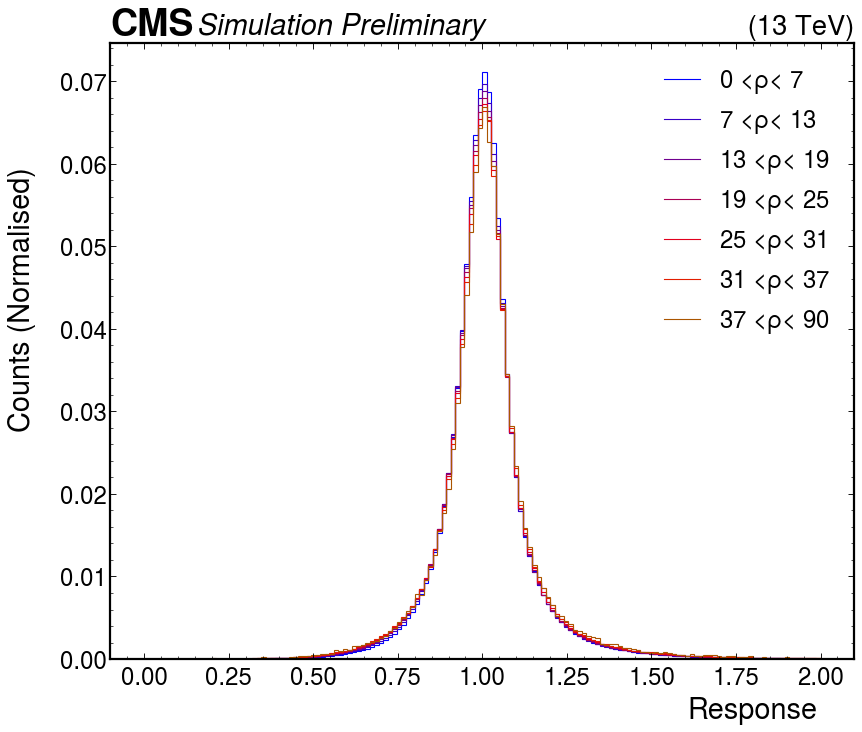

In [148]:
fig = plt.figure(figsize = (12,10))
hist_frac_rho = hist.project("rho","frac").to_numpy()[0]
cm = plt.get_cmap('brg')
colors = [cm(1.*i/9) for i in range(len(rho_values))]
ax = plt.subplot()
ax.set_prop_cycle(color=colors)
for i in range(7):
    ax.stairs( hist_frac_rho[i]/np.sum(hist_frac_rho[i]),frac_bins,  label = str(int(rho_bins[i]))+r" <$\rho$< "  + str(int(rho_bins[i+1])) )
    ax.set_xlabel("Response")
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
adjust_plot(ax, ylabel = "Counts (Normalised)", ylabel_coord=0.8)
ax.legend() 
hep.cms.label("Preliminary")

In [149]:
histfit_frac_rho = Histfit(hist_frac_rho, frac_values, rho_values)
histfit_frac_rho.store_parameters()

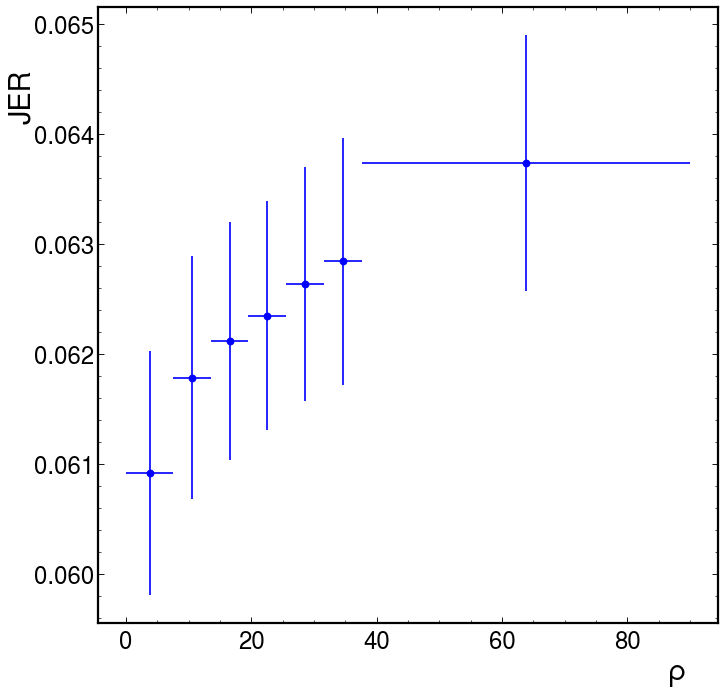

In [150]:
sigma_list = histfit_frac_rho.parameters["sigma"]
sigma_error_list  = histfit_frac_rho.parameters["sigmaErr"]

ax = plt.subplot()
ax.errorbar(rho_values[:], sigma_list[:], np.power(sigma_error_list[:], 0.5), xerr = rho_widths[:]/2,  marker = 'o', linestyle = "", color = 'b', label = r'JER')
#plt.xlabel(r"$p_T$ (GeV)")
adjust_plot(ax, xlabel = r"$\rho$ ", ylabel = "JER")
#plt.xscale("log")

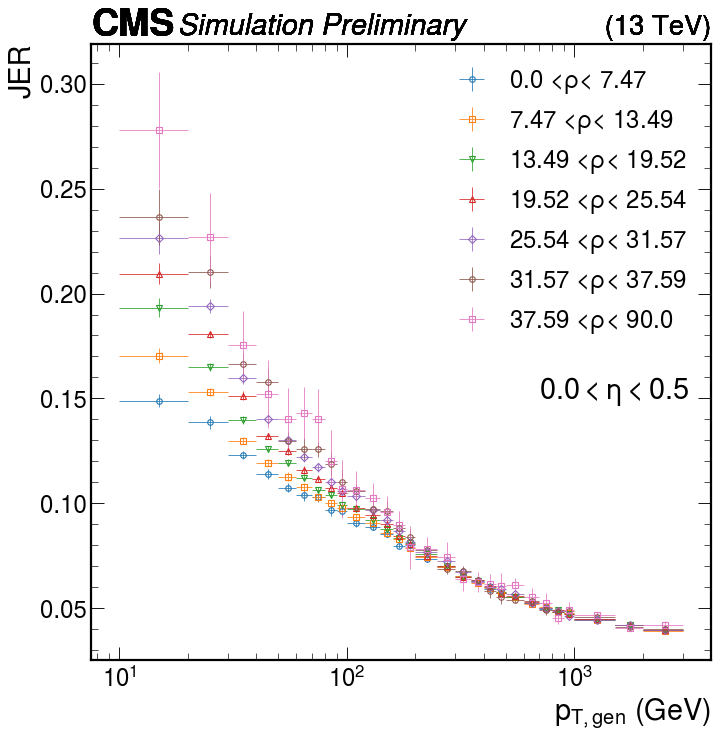

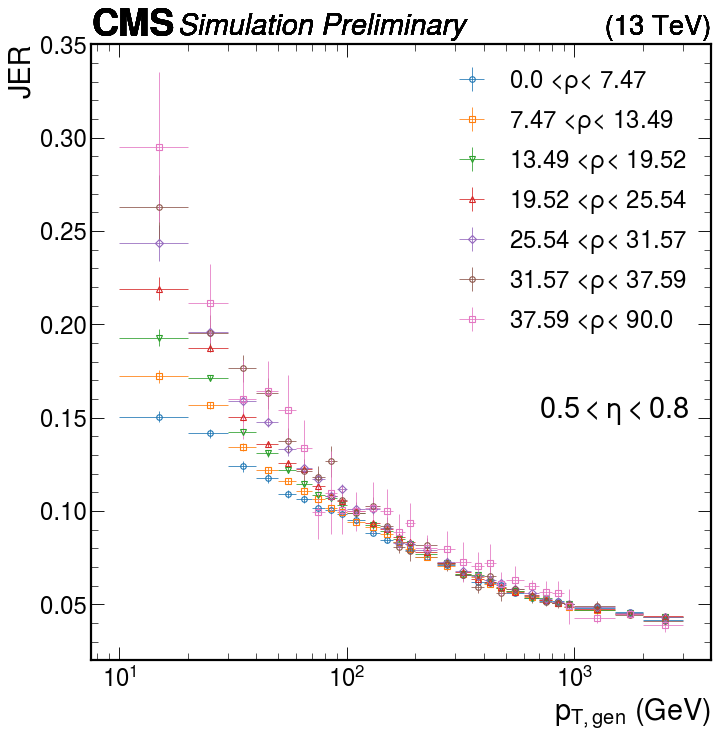

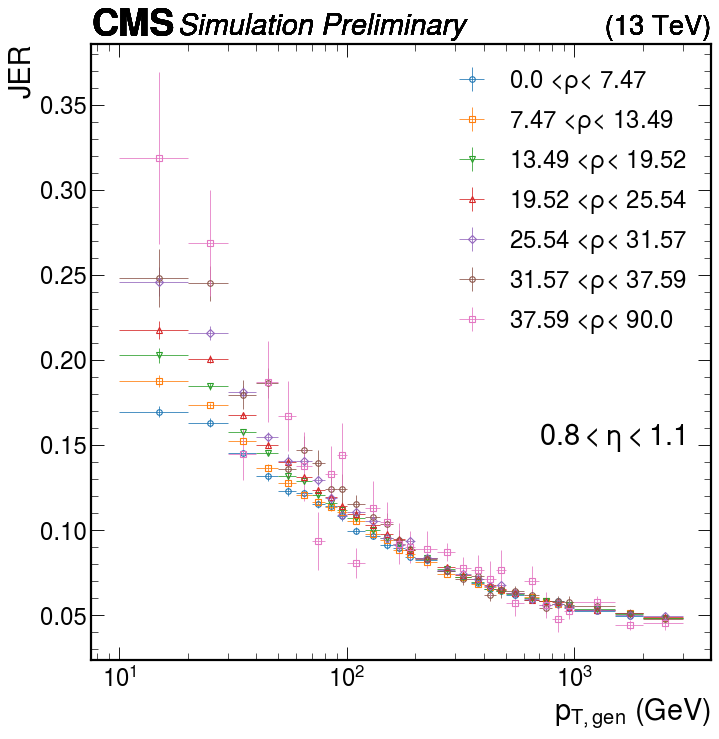

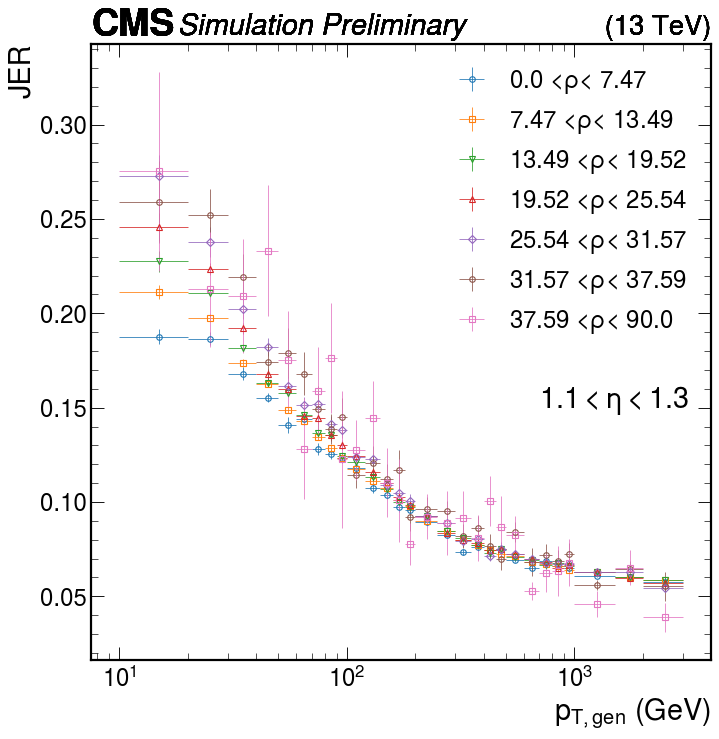

ValueError: `ydata` must not be empty!

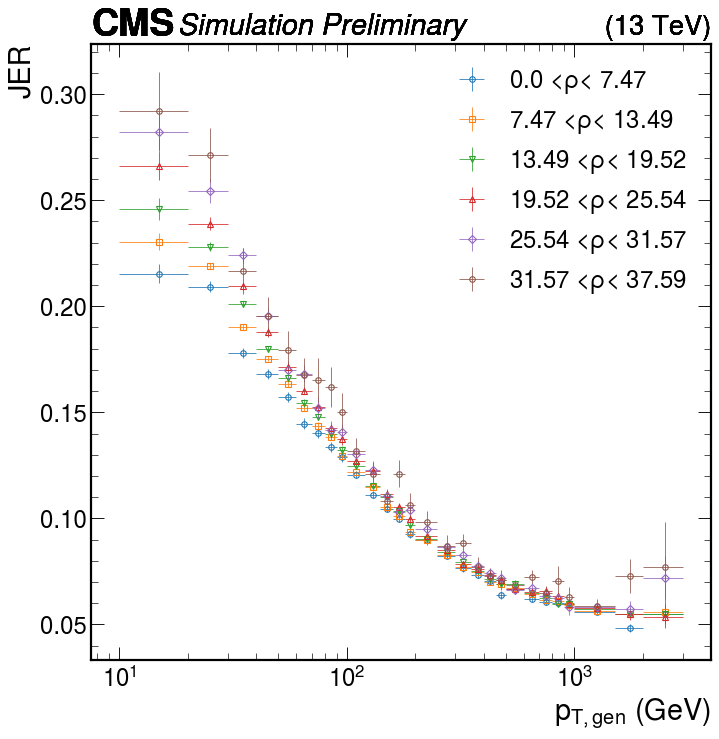

In [151]:
hist_eta_rho_pt_frac = hist.project("eta","rho","pt","frac").to_numpy()[0]
for i, hist_rho_pt_frac in enumerate(hist_eta_rho_pt_frac):
    if i == 5:
        break
    import itertools
    ax = plt.subplot()
    markers = itertools.cycle(['o', 's', 'v', '^', 'D'])
    for i_rho, hist_pt_frac in enumerate(hist_rho_pt_frac):
        histfit = Histfit(hist_pt_frac, frac_values, pt_values)
        histfit.store_parameters()

        sigma_list = histfit.parameters["sigma"]
        sigma_error_list  = histfit.parameters["sigmaErr"]

        
        ax.errorbar(pt_values, sigma_list, np.power(sigma_error_list, 0.5), xerr = pt_widths/2,   linestyle = "",  label = str(round(rho_bins[i_rho],2))+r" <$\rho$< "  + str(round(rho_bins[i_rho+1],2)), fmt = next(markers), markersize = 5, markerfacecolor='none', linewidth = 0.7)
        plt.xlabel(r"$p_{T,gen}$ (GeV)")
        plt.ylabel("JER")
        plt.xscale("log")
        
        hep.cms.label("Preliminary")
        plt.legend()
    plt.text(700, 0.15, str(round(eta_bins[i],1))+r'$ <\eta< $'+str(round(eta_bins[i+1],1)))
    plt.show()
        #adjust_plot(ax, xlabel = r"$p_T$ (GeV)", ylabel = "JER",show_legend=True, ylabel_coord=0.9, xscale= 'log')

In [202]:
hist = output["pt_reco_over_gen"]


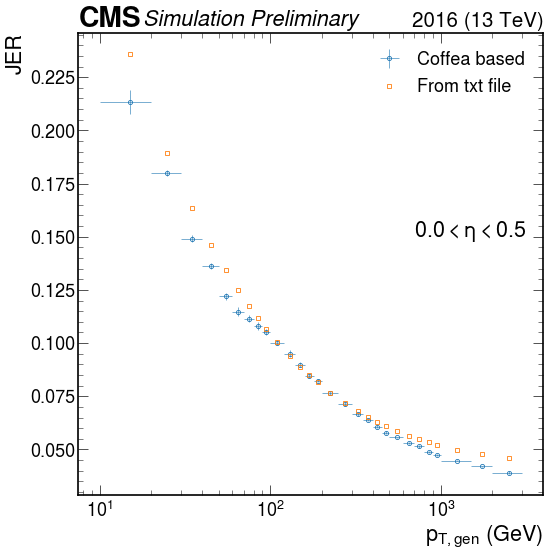

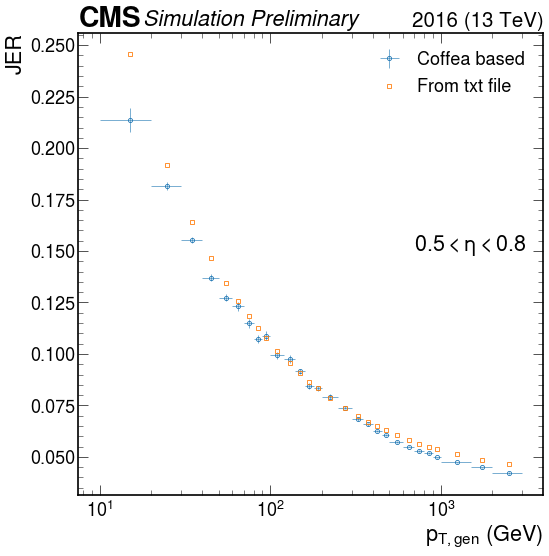

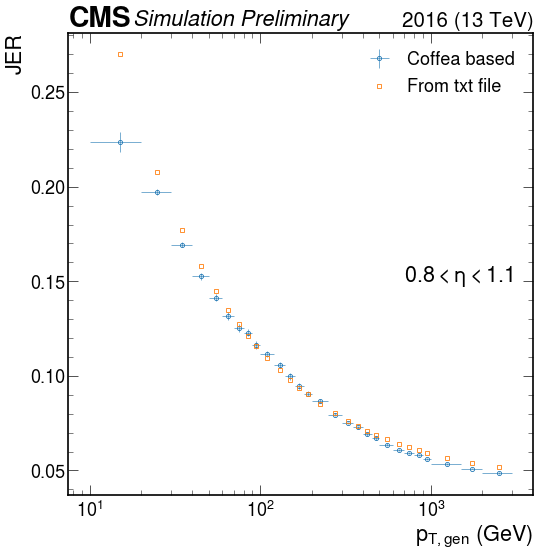

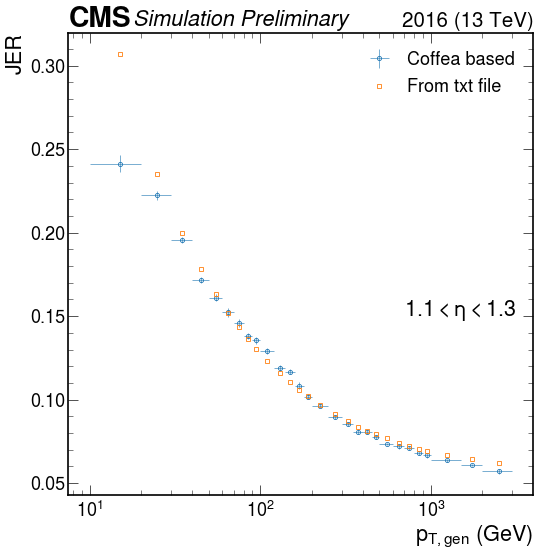

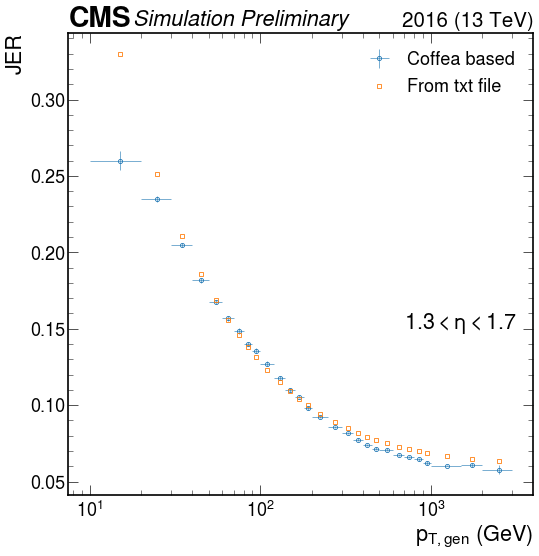

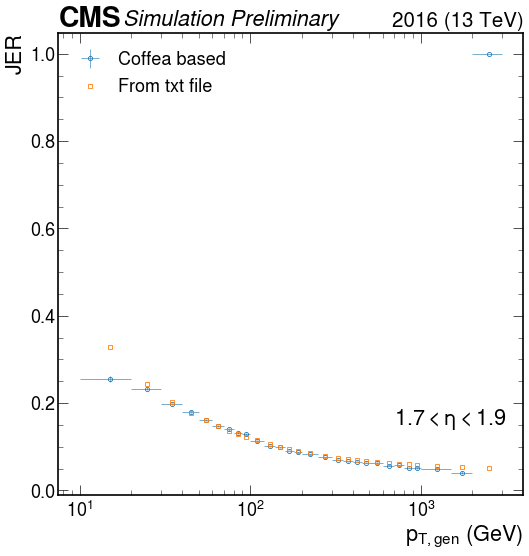

ValueError: `ydata` must not be empty!

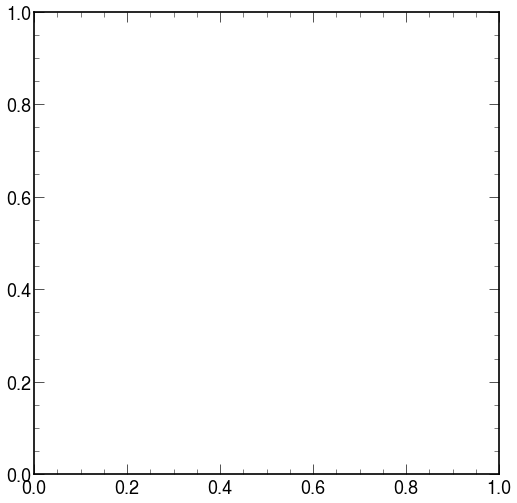

In [203]:
import itertools
for i_eta in range(8):
    hist_rho_pt_frac = hist.project("eta","rho","pt","frac").to_numpy()[0][i_eta]
    ax = plt.subplot()
    markers = itertools.cycle(['o', 's', 'v', '^', 'D'])
    i_rho = 3
    hist_pt_frac = hist_rho_pt_frac[i_rho]
    histfit = Histfit(hist_pt_frac, frac_values, pt_values)
    histfit.store_parameters()

    sigma_list = histfit.parameters["sigma"]
    sigma_error_list  = histfit.parameters["sigmaErr"]


    ax.errorbar(pt_values, sigma_list, np.power(sigma_error_list, 0.5), xerr = pt_widths/2,   linestyle = "",  
                label ="Coffea based", fmt = next(markers), markersize = 5, markerfacecolor='none', linewidth = 0.7)

    plt.xlabel(r"$p_{T,gen}$ (GeV)")
    plt.ylabel("JER")
    plt.xscale("log")

    #jerfile = "Summer20UL16_JRV3_MC_PtResolution_AK4PFchs.txt"
    #jerfile = "Summer19UL17_JRV2_MC_PtResolution_AK4PFchs.txt"
    jerfile = "Summer19UL18_JRV2_MC_PtResolution_AK4PFchs.txt"
    #jerfile = "Summer20UL16APV_JRV3_MC_PtResolution_AK4PFchs.txt"
    plt.errorbar(x = pt_values, y = [computeJER(pt = pt,eta = eta_values[i_eta],rho = 20, filename = jerfile) for pt in pt_values], fmt = next(markers) ,
                     label = "From txt file",linestyle = "", markersize = 5, markerfacecolor='none')

    hep.cms.label("Preliminary", year = 2016)

    hep.cms.annotations
    plt.legend()
    plt.text(700, 0.15, str(round(eta_bins[i_eta],1))+r'$ <\eta< $'+str(round(eta_bins[i_eta+1],1)))
    plt.show()

In [ ]:
jerfile18 = "Summer19UL18_JRV2_MC_PtResolution_AK4PFchs.txt"
plt.errorbar(x = pt_values, y = [computeJER(pt = pt,eta = 0.2,rho = 20, filename = jerfile18) for pt in pt_values], fmt = next(markers) ,
                 label = str(round(rho_bins[i_rho],2))+r" <$\rho$< "  + str(round(rho_bins[i_rho+1],2)),linestyle = "", markersize = 5, markerfacecolor='none')